# Pytorch

In [4]:
import pygame
import random

Starting_blue_blobs = 10
Starting_red_blobs = 3

WIDTH = 800
HEIGHT = 600
WHITE = (255,255,255)
BLUE = (0,0,255)
RED = (255,0,0)

game_display = pygame.display.set_mode((WIDTH , HEIGHT))
pygame.display.set_caption("FIRST GAME")
clock = pygame.time.Clock()


class Blob:
    def __init__(self, color):
        self.x = random.randrange(0 , WIDTH)
        self.y = random.randrange(0 , HEIGHT)
        self.size = random.randrange(4,8)
        self.color = color
    def move(self):
        self.move_x = random.randrange(-1,2)
        self.move_y = random.randrange(-1,2)
        self.x += self.move_x
        self.y += self.move_y
        
        if self.x < 0 : self.x = 0
        elif self.x > WIDTH : self.x = WIDTH
        
        if self.y < 0 : self.y = 0
        elif self.y > HEIGHT :  self.y = HEIGHT


def draw_environment(blob_list):
    game_display.fill(WHITE)
    
    for blob_dict in blob_list:
        for blob_id in blob_dict:
            blob = blob_dict[blob_id]
            pygame.draw.circle(game_display , blob.color , [blob.x , blob.y] , blob.size)
            blob.move()
    pygame.display.update()
    
    
def main():
    blue_blobs = dict(enumerate([Blob(BLUE) for i in range(Starting_blue_blobs)]))
    red_blobs = dict(enumerate([Blob(RED) for i in range(Starting_red_blobs)]))
    while True:
        for event in pygame.event.get():
            if event.type == pygame.QUIT :
                pygame.quit()
                quit()
        draw_environment([blue_blobs,red_blobs])
        clock.tick(60)
        
        
if __name__ == '__main__':
    main()
        

pygame 2.0.1 (SDL 2.0.14, Python 3.8.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


error: display Surface quit

In [2]:
import torch

x = torch.tensor([3,5])
y = torch.tensor([2,2])

print(x*y)

tensor([ 6, 10])


In [3]:
x = torch.zeros([3,5])
x

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [4]:
y = torch.rand([2,3])
y

tensor([[0.1654, 0.8922, 0.3168],
        [0.1930, 0.3742, 0.9919]])

In [5]:
y.view([1,6])

tensor([[0.1654, 0.8922, 0.3168, 0.1930, 0.3742, 0.9919]])

In [1]:
import torch
import torchvision
from torchvision import transforms , datasets


In [2]:
train = datasets.MNIST('' , train = True , download = True,
                      transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST('' , train = False , download = True,
                      transform = transforms.Compose([transforms.ToTensor()]))

In [3]:
trainset = torch.utils.data.DataLoader(train , batch_size = 10 , shuffle = True)
testset  = torch.utils.data.DataLoader(test , batch_size = 10 , shuffle = True)

In [4]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [5]:
x,y  = data[0][0] , data[1][0]
print(y)

tensor(1)


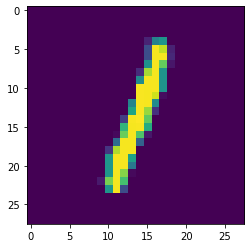

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x.view(28,28))
plt.show()

In [9]:
total = 0 
counter_dict = {0:0 , 1:0 , 2:0 , 3:0 ,4:0 , 5:0 , 6:0 , 7:0 , 8:0  , 9:0}

for data in trainset:
    Xs , ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1
        
print(counter_dict)        

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [10]:
for i in counter_dict:
    print(f"{i} : {counter_dict[i]/total*100}")

0 : 9.871666666666666
1 : 11.236666666666666
2 : 9.93
3 : 10.218333333333334
4 : 9.736666666666666
5 : 9.035
6 : 9.863333333333333
7 : 10.441666666666666
8 : 9.751666666666667
9 : 9.915000000000001


In [14]:
import torch.nn as nn
import torch.nn.functional as F

In [8]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28 , 32)
        self.fc2 = nn.Linear(32 , 32)
        self.fc3 = nn.Linear(32 , 32)
        self.fc4 = nn.Linear(32 , 10)
        
    def forward(self , x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.log_softmax(x , dim = 1)
        

        
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=10, bias=True)
)


In [18]:
X = torch.rand((28,28))
X = X.view(-1 , 28*28)

In [19]:
output = net(X)

In [20]:
output

tensor([[-2.3625, -2.1733, -2.1567, -2.3238, -2.3351, -2.2978, -2.4240, -2.2415,
         -2.4924, -2.2676]], grad_fn=<LogSoftmaxBackward>)

In [9]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters() , lr= 0.001)

Epochs = 3

for epoch in range(Epochs):
    for data in trainset:
        X , y  = data
        net.zero_grad()
        output = net(X.view(-1 , 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.2580, grad_fn=<NllLossBackward>)
tensor(0.0058, grad_fn=<NllLossBackward>)
tensor(0.0960, grad_fn=<NllLossBackward>)


In [10]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X , y = data
        output= net(X.view(-1,784))
        for idx , i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("accuracy: " , round(correct/total , 3))            

accuracy:  0.972


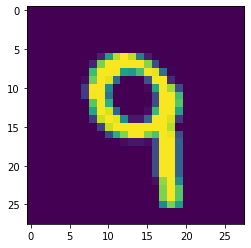

In [11]:
import matplotlib.pyplot as plt

plt.imshow(X[0].view(28,28))
plt.show()

In [13]:
print(torch.argmax(net(X[0].view(-1,784))[0]))

tensor(9)


In [13]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [15]:
N = 1000
X = np.random.random((N, 2)) * 6 - 3 # uniformly distributed between (-3, +3)
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

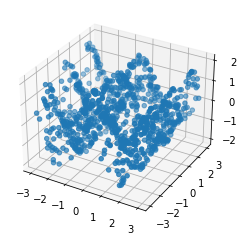

In [16]:
# Plot it
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
# plt.show()

In [17]:
X.shape

(1000, 2)

In [18]:
X[0]

array([-1.11176127, -0.90845396])

In [19]:
# Build the model
model = nn.Sequential(
    nn.Linear(2, 128),
    nn.ReLU(),
    nn.Linear(128, 1)
)

In [20]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [21]:
# Train the model
def full_gd(model, criterion, optimizer, X_train, y_train, epochs=1000):
  # Stuff to store
  train_losses = np.zeros(epochs)

  for it in range(epochs):
    # zero the parameter gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
      
    # Backward and optimize
    loss.backward()
    optimizer.step()

    # Save losses
    train_losses[it] = loss.item()
      
    if (it + 1) % 50 == 0:
      print(f'Epoch {it+1}/{epochs}, Train Loss: {loss.item():.4f}')
  
  return train_losses

X_train = torch.from_numpy(X.astype(np.float32))
y_train = torch.from_numpy(Y.astype(np.float32).reshape(-1, 1))
train_losses = full_gd(model, criterion, optimizer, X_train, y_train)

Epoch 50/1000, Train Loss: 0.6575
Epoch 100/1000, Train Loss: 0.2387
Epoch 150/1000, Train Loss: 0.1076
Epoch 200/1000, Train Loss: 0.0381
Epoch 250/1000, Train Loss: 0.0153
Epoch 300/1000, Train Loss: 0.0083
Epoch 350/1000, Train Loss: 0.0084
Epoch 400/1000, Train Loss: 0.0046
Epoch 450/1000, Train Loss: 0.0039
Epoch 500/1000, Train Loss: 0.0046
Epoch 550/1000, Train Loss: 0.0033
Epoch 600/1000, Train Loss: 0.0030
Epoch 650/1000, Train Loss: 0.0123
Epoch 700/1000, Train Loss: 0.0027
Epoch 750/1000, Train Loss: 0.0039
Epoch 800/1000, Train Loss: 0.0026
Epoch 850/1000, Train Loss: 0.0025
Epoch 900/1000, Train Loss: 0.0023
Epoch 950/1000, Train Loss: 0.0022
Epoch 1000/1000, Train Loss: 0.0023


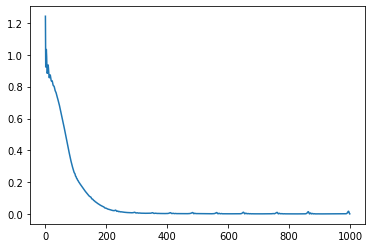

In [22]:
plt.plot(train_losses)

# CNN

In [5]:
train_dataset = torchvision.datasets.CIFAR10(root='.' , train = True , 
                                                 transform = transforms.ToTensor(),
                                                 download = True)


Files already downloaded and verified


In [6]:
test_dataset = torchvision.datasets.CIFAR10(root='.' , train = False , 
                                                 transform = transforms.ToTensor(),
                                                 download = True)

Files already downloaded and verified


In [8]:
train_dataset.data.shape

(50000, 32, 32, 3)

In [10]:
k = len(set(train_dataset.targets))
print('number of classes: ' , k)

number of classes:  10


In [11]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                          batch_size = 16,
                                          shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = 16,
                                          shuffle = True)

In [15]:
class CNN(nn.Module):
    def __init__(self , k):
        super(CNN,self).__init__()
        
        self.conv1 = nn.Conv2d(3,32,kernel_size = 3 , stride = 2)
        self.conv2 = nn.Conv2d(32,64 ,kernel_size = 3 , stride = 2)
        self.conv3 = nn.Conv2d(64,128,kernel_size = 3 , stride = 2)
        
        self.fc1 = nn.Linear(128*3*3 , 1024)
        self.fc2 = nn.Linear(1024 , k)
    
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = x.view(-1,128*3*3)
        x = F.dropout(x, p=0.5)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, p=0.2)
        x = self.fc2(x)
        
        return x

In [16]:
model = CNN(k)
print(model)

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
  (fc1): Linear(in_features=1152, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=10, bias=True)
)


In [25]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cpu


CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
  (fc1): Linear(in_features=1152, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=10, bias=True)
)

In [17]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [26]:
# A function to encapsulate the training loop
def batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs):
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for it in range(epochs):
    t0 = datetime.now()
    train_loss = []
    for inputs, targets in train_loader:
      # move data to GPU
      inputs, targets = inputs.to(device), targets.to(device)

      # zero the parameter gradients
      optimizer.zero_grad()

      # Forward pass
      outputs = model(inputs)
      loss = criterion(outputs, targets)
        
      # Backward and optimize
      loss.backward()
      optimizer.step()

      train_loss.append(loss.item())

    # Get train loss and test loss
    train_loss = np.mean(train_loss) # a little misleading
    
    test_loss = []
    for inputs, targets in test_loader:
      inputs, targets = inputs.to(device), targets.to(device)
      outputs = model(inputs)
      loss = criterion(outputs, targets)
      test_loss.append(loss.item())
    test_loss = np.mean(test_loss)

    # Save losses
    train_losses[it] = train_loss
    test_losses[it] = test_loss
    
    dt = datetime.now() - t0
    print(f'Epoch {it+1}/{epochs}, Train Loss: {train_loss:.4f}, \
      Test Loss: {test_loss:.4f}, Duration: {dt}')
  
  return train_losses, test_losses

In [29]:
from datetime import datetime
train_losses, test_losses = batch_gd(
    model, criterion, optimizer, train_loader, test_loader, epochs=2)

Epoch 1/2, Train Loss: 1.0944,       Test Loss: 1.1630, Duration: 0:02:11.520014
Epoch 2/2, Train Loss: 1.0357,       Test Loss: 1.1039, Duration: 0:02:10.652371


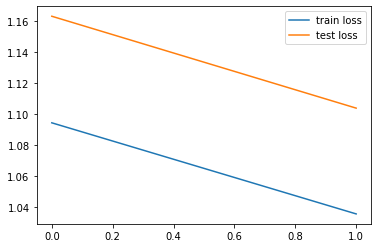

In [30]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [31]:
# Accuracy

n_correct = 0.
n_total = 0.
for inputs, targets in train_loader:
  # Move to GPU
  inputs, targets = inputs.to(device), targets.to(device)

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  # torch.max returns both max and argmax
  _, predictions = torch.max(outputs, 1)
  
  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

train_acc = n_correct / n_total


n_correct = 0.
n_total = 0.
for inputs, targets in test_loader:
  # Move to GPU
  inputs, targets = inputs.to(device), targets.to(device)
  
  # Forward pass
  outputs = model(inputs)

  # Get prediction
  # torch.max returns both max and argmax
  _, predictions = torch.max(outputs, 1)
  
  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

test_acc = n_correct / n_total
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.6639, Test acc: 0.6100


In [32]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

Confusion matrix, without normalization
[[ 92 126  74 121 113 101  98  97  82  96]
 [ 98 113  81 110 116  91  93  90  96 112]
 [ 82 113  92 129 108  96 105 102  86  87]
 [ 88 101  84 119 107  86 108 111  94 102]
 [110 112  89  99  99 106 111 108  78  88]
 [ 94 102 103 126  86 106 105 104  89  85]
 [ 94 109  71 119 122  87 117  98  76 107]
 [ 92 100  99 126 109  82 115  92  82 103]
 [105 100  74  99 111  78 113 104 109 107]
 [ 95 110  76 132 104  98 116  81  76 112]]


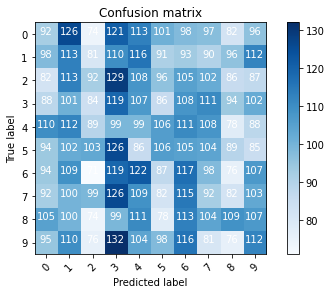

In [33]:
# get all predictions in an array and plot confusion matrix

x_test = test_dataset.data
y_test = np.array(test_dataset.targets)
p_test = np.array([])
for inputs, targets in test_loader:
  # Move to GPU
  inputs, targets = inputs.to(device), targets.to(device)

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  _, predictions = torch.max(outputs, 1)
  
  # update p_test
  p_test = np.concatenate((p_test, predictions.cpu().numpy()))

cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [34]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

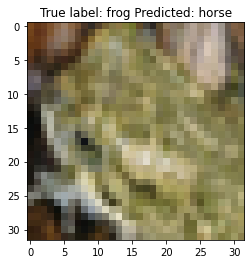

In [35]:
# Show some misclassified examples
p_test = p_test.astype(np.uint8)
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(32,32,3))
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));